1.Import the necessary libraries and read the data.

In [2]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from plotly import express as px

In [3]:
df=pd.read_csv('fifa.csv')
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


2.Drop any columns that you deem unecessary for analysis.

In [4]:
df.isnull().sum()/len(df)*100
df.drop(columns=['Loaned From'],inplace=True)

3.The following columns need to be converted for further analysis:

In [5]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                

In [6]:
# Change Value into Float

In [7]:
df['Value']=df['Value'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Value']=df['Value'].astype('float')

In [8]:
#1.Change Wage into Float

In [9]:
df['Wage']=df['Wage'].str.replace('€','').str.replace('K','000')
df['Wage']=df['Wage'].astype('float')

In [10]:
#2.Change Joined to DateTime

In [11]:
df['Joined']=pd.to_datetime(df['Joined'])
df['Joined_Year']=df['Joined'].dt.year
df['Joined_Year']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined_Year, Length: 18207, dtype: float64

In [12]:
#3.To datetime

In [13]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until']=df['Contract Valid Until'].dt.year
df['Contract Valid Until']

0        2021.0
1        2022.0
2        2022.0
3        2020.0
4        2023.0
          ...  
18202    2019.0
18203    2020.0
18204    2021.0
18205    2019.0
18206    2019.0
Name: Contract Valid Until, Length: 18207, dtype: float64

In [14]:
#4.Inches

In [15]:
df['Height']=df['Height'].str.replace("'",'.')
df['Height']=df['Height'].astype('float')

In [16]:
#5.Weight

In [17]:
df['Weight']=df['Weight'].str.replace('lbs','')
df['Weight']=df['Weight'].astype('float')

In [18]:
#6. Release

In [19]:
df['Release Clause']=df['Release Clause'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Release Clause']=df['Release Clause'].astype('float',)

# Data Cleaning

In [20]:
#Deal with Null

In [21]:
df.isnull().sum()/len(df)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Photo                       0.000000
Nationality                 0.000000
Flag                        0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Club Logo                   0.000000
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
S

In [22]:
df.Club.fillna(df.Club.mode(),inplace=True)

In [23]:
print(df['Release Clause'].skew())
print(df['Joined_Year'].skew())

19.201279995049465
-2.533547109677173


In [24]:
df.dtypes

ID                                   int64
Name                                object
Age                                  int64
Photo                               object
Nationality                         object
Flag                                object
Overall                              int64
Potential                            int64
Club                                object
Club Logo                           object
Value                              float64
Wage                               float64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Jersey Number                      float64
Joined                      datetime64[ns]
Contract Valid Until               float64
Height                             float64
Weight     

In [25]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna(df[i].mode(),inplace=True)
    elif df[i].dtypes=='float':
        if df[i].skew() > 0.9 and df[i].skew() < -1:
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(method='ffill',inplace=True)

In [26]:
df.isnull().sum()/len(df)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Photo                       0.000000
Nationality                 0.000000
Flag                        0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Club Logo                   0.000000
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.000000
Weak Foot                   0.000000
Skill Moves                 0.000000
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.000000
Joined                      0.000000
Contract Valid Until        0.000000
Height                      0.000000
Weight                      0.000000
Crossing                    0.000000
Finishing                   0.000000
HeadingAccuracy             0.000000
S

#1.Plot the distribution of Overall rating for all players. 

<AxesSubplot:xlabel='Overall', ylabel='Count'>

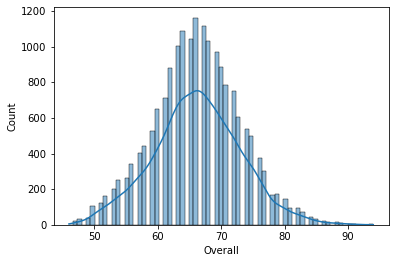

In [27]:
df['Overall'].skew()
sns.histplot(x='Overall',data=df,kde=True)

<AxesSubplot:xlabel='Overall'>

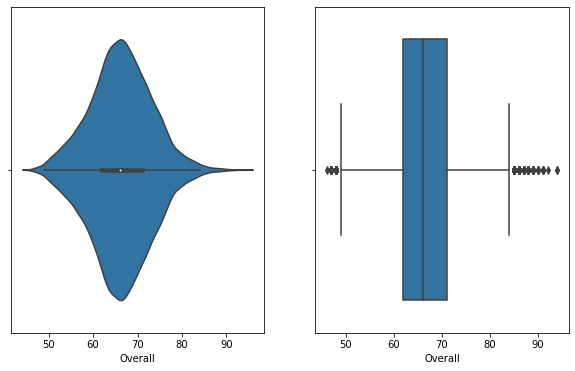

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.violinplot(x='Overall',data=df,kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='Overall',data=df)

2.Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


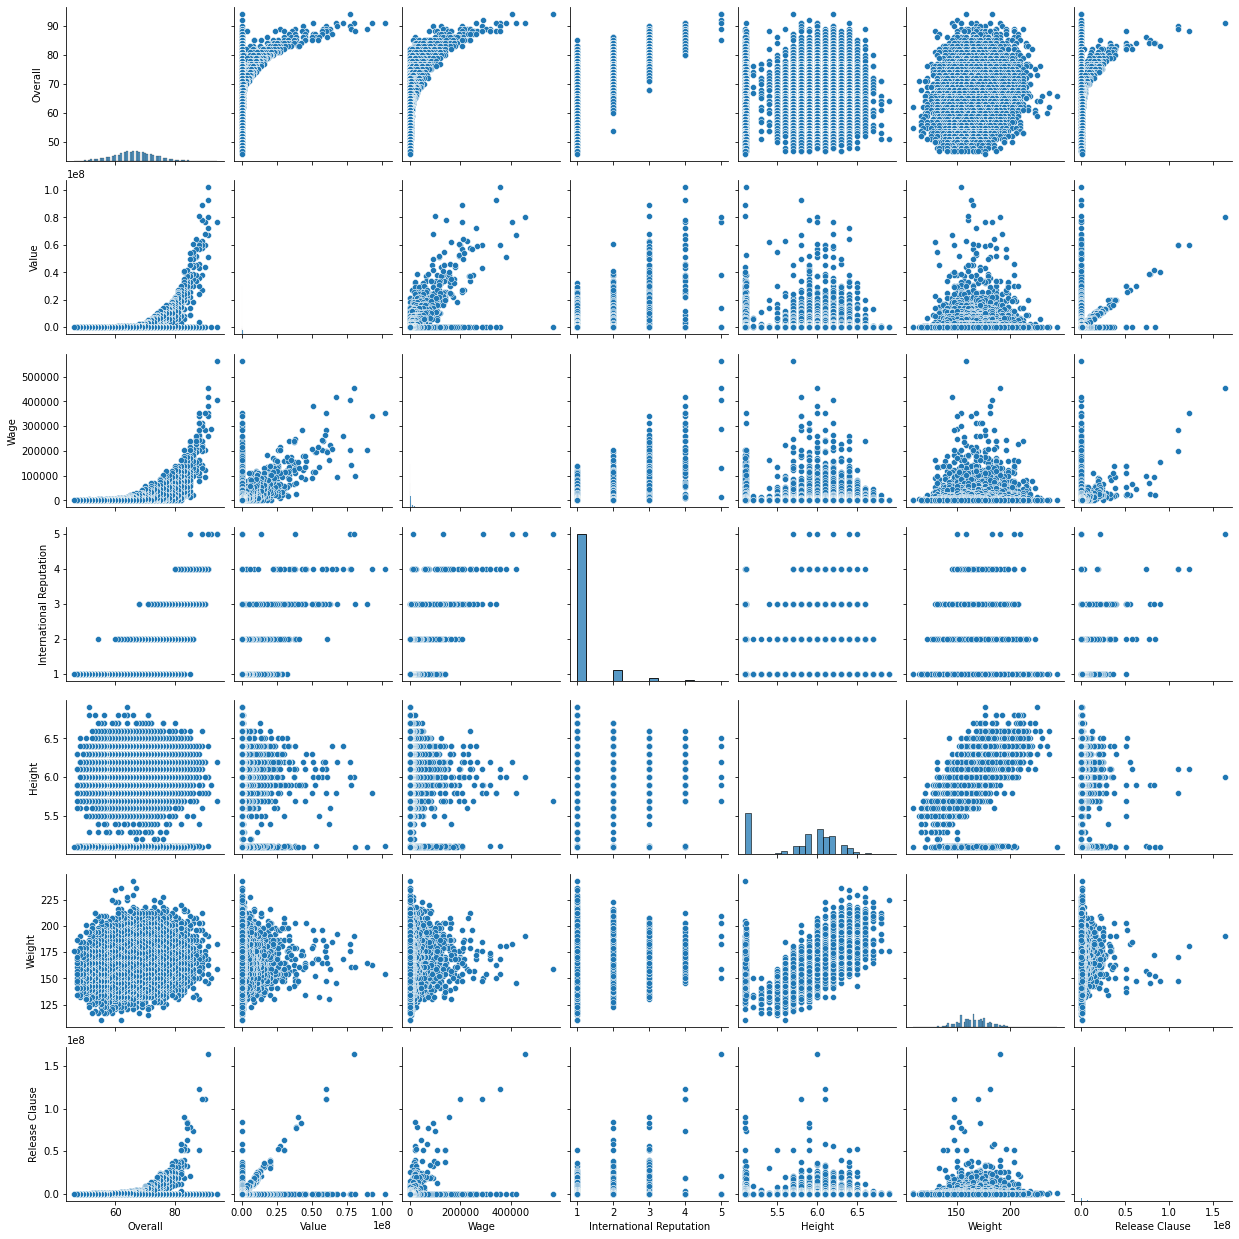

In [29]:
sns.pairplot(vars=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause'],data=df)

3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [30]:
df.columns
df2=df[df['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20)

a) What would the average wage for this set of players be?

In [31]:
print('The Average Wage for the Players are', round(df['Wage'].mean(),3))

The Average Wage for the Players are 9731.312


b)What is the average age

In [33]:
print('The Average age for the Players are', round(df['Age'].mean(),2))

The Average age for the Players are 25.12


c)Is there a correlation between the Overall rating and Value for these players

Correlation is 0.3947582177155499
Moderate Correlation


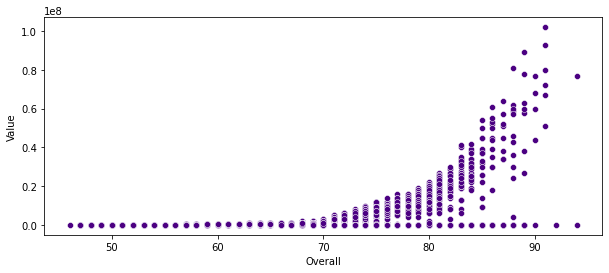

In [67]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Overall',y='Value',data=df,color='indigo')
print('Correlation is',df['Overall'].corr(df['Value']))
print('Moderate Correlation')

4.Generate tables containing the top 5 players by Overall rating for each unique position.

In [40]:
df['Position'].fillna(method='ffill',inplace=True)

In [72]:
df99=df.groupby('Position').head(5).sort_values(by=['Position','Overall'],ascending=[True,False])
df991=df99[['Name','Position','Overall']]
df991

,Name,Position,Overall
17,A. Griezmann,CAM,89
31,C. Eriksen,CAM,88
61,Roberto Firmino,CAM,86
66,T. Müller,CAM,86
74,M. Özil,CAM,86
...,...,...,...
1,Cristiano Ronaldo,ST,94
10,R. Lewandowski,ST,90
16,H. Kane,ST,89
23,S. Agüero,ST,89


In [83]:
px.bar(x='Name',y='Position',pattern_shape='Overall',data_frame=df991)

<AxesSubplot:>

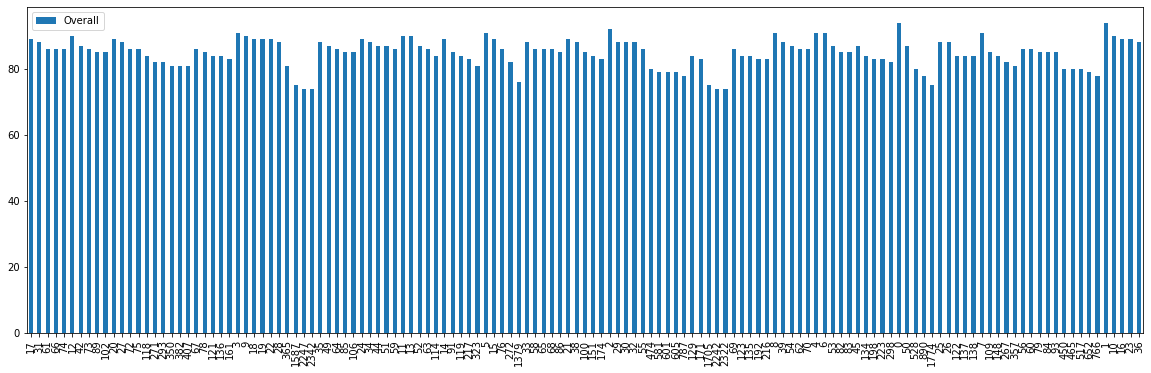

In [69]:
df991.plot(kind='bar',figsize=(20,6))

a)Are there any players appearing in more than one Table. Please point out such players.

In [38]:
print('There are',df99[['Name','Position','Overall']].duplicated().sum(),'players appearing in more than one Table')

There are 0 players appearing in more than one Table


b)What is the average wage one can expect to pay for the top 5 in every position

In [39]:
df99.groupby(by='Position').mean()['Wage'].sort_values(ascending=False)

Position
ST     294000.0
LW     261000.0
RCM    240800.0
RCB    231000.0
CDM    217000.0
RW     202000.0
GK     192800.0
LCM    184400.0
LB     177200.0
CAM    174000.0
LM     164600.0
LCB    162000.0
RB     155400.0
RF     148000.0
CB     139600.0
RS     132200.0
RM     131400.0
CM     130600.0
LS     130200.0
LDM    126600.0
LF     121200.0
RDM    105000.0
LAM     81600.0
CF      47400.0
RAM     45400.0
RWB     44200.0
LWB     34200.0
Name: Wage, dtype: float64

<AxesSubplot:xlabel='Position'>

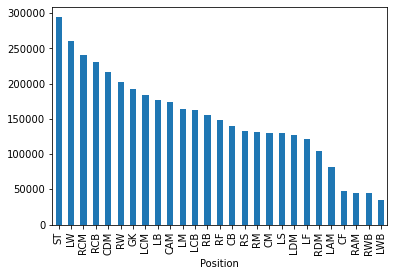

In [36]:
df99.groupby(by='Position').mean()['Wage'].sort_values(ascending=False).plot(kind='bar')

In [37]:
# Plot the outliers

In [118]:
q3=df['Release Clause'].quantile(0.75)
q1=df['Release Clause'].quantile(0.25)
iqr=q3-q1
ul=q3+2*iqr
ll=q1-2*iqr
print('The Upper Limit is', ul)
print('The Lower Limit is', ll)

The Upper Limit is 1511992.6
The Lower Limit is -1007988.9
